MODELAGEM DE DISPERSÃO \
Neste notebook vamos implementar um modelo de dispersão gaussiano.

In [22]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

In [21]:
# Criando função da estimativa da dispersão lateral e vertical da pluma
def sigmaXY(x,classe,urbOrRural):
    if urbOrRural=='urbano':
        if (classe=='A') or (classe=='B'):
            sigmaY = 0.32*x*(1+0.0004*x)**(-0.5)
            sigmaZ = 0.24*x*(1+0.001*x)**(0.5)
        else:
            print('Classe de estabilidade errada')
    if urbOrRural=='rural':
        if (classe=='A') :
            sigmaY = 0.22*x*(1+0.0001*x)**(-0.5)
            sigmaZ = 0.20*x
        else:
            print('Classe de estabilidade errada. Fique ligado')
    return sigmaY,sigmaZ

In [20]:
# Utilizando a função do modelo gaussiano
qs = 100  # g/s
sigmaY = 10  # m
sigmaZ = 15  # m
u = 10  # m/s
y = 0  # estimando na direção do vento
z = 1.5  # altura do nariz
H = 50  # m

# Chamando a função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, y, z, H)

print("A concentração estimada é = " + str(conc) + ' µg/m³')



A concentração estimada é = 5.69606721961475e-05 µg/m³


C:\Users\PC\AppData\Local\Temp\ipykernel_6120\3691735797.py:25: UserWarning: Log scale: values of z <= 0 have been masked
  cf = ax[0].contourf(xx, yy, conc, cmap='viridis', norm=LogNorm())


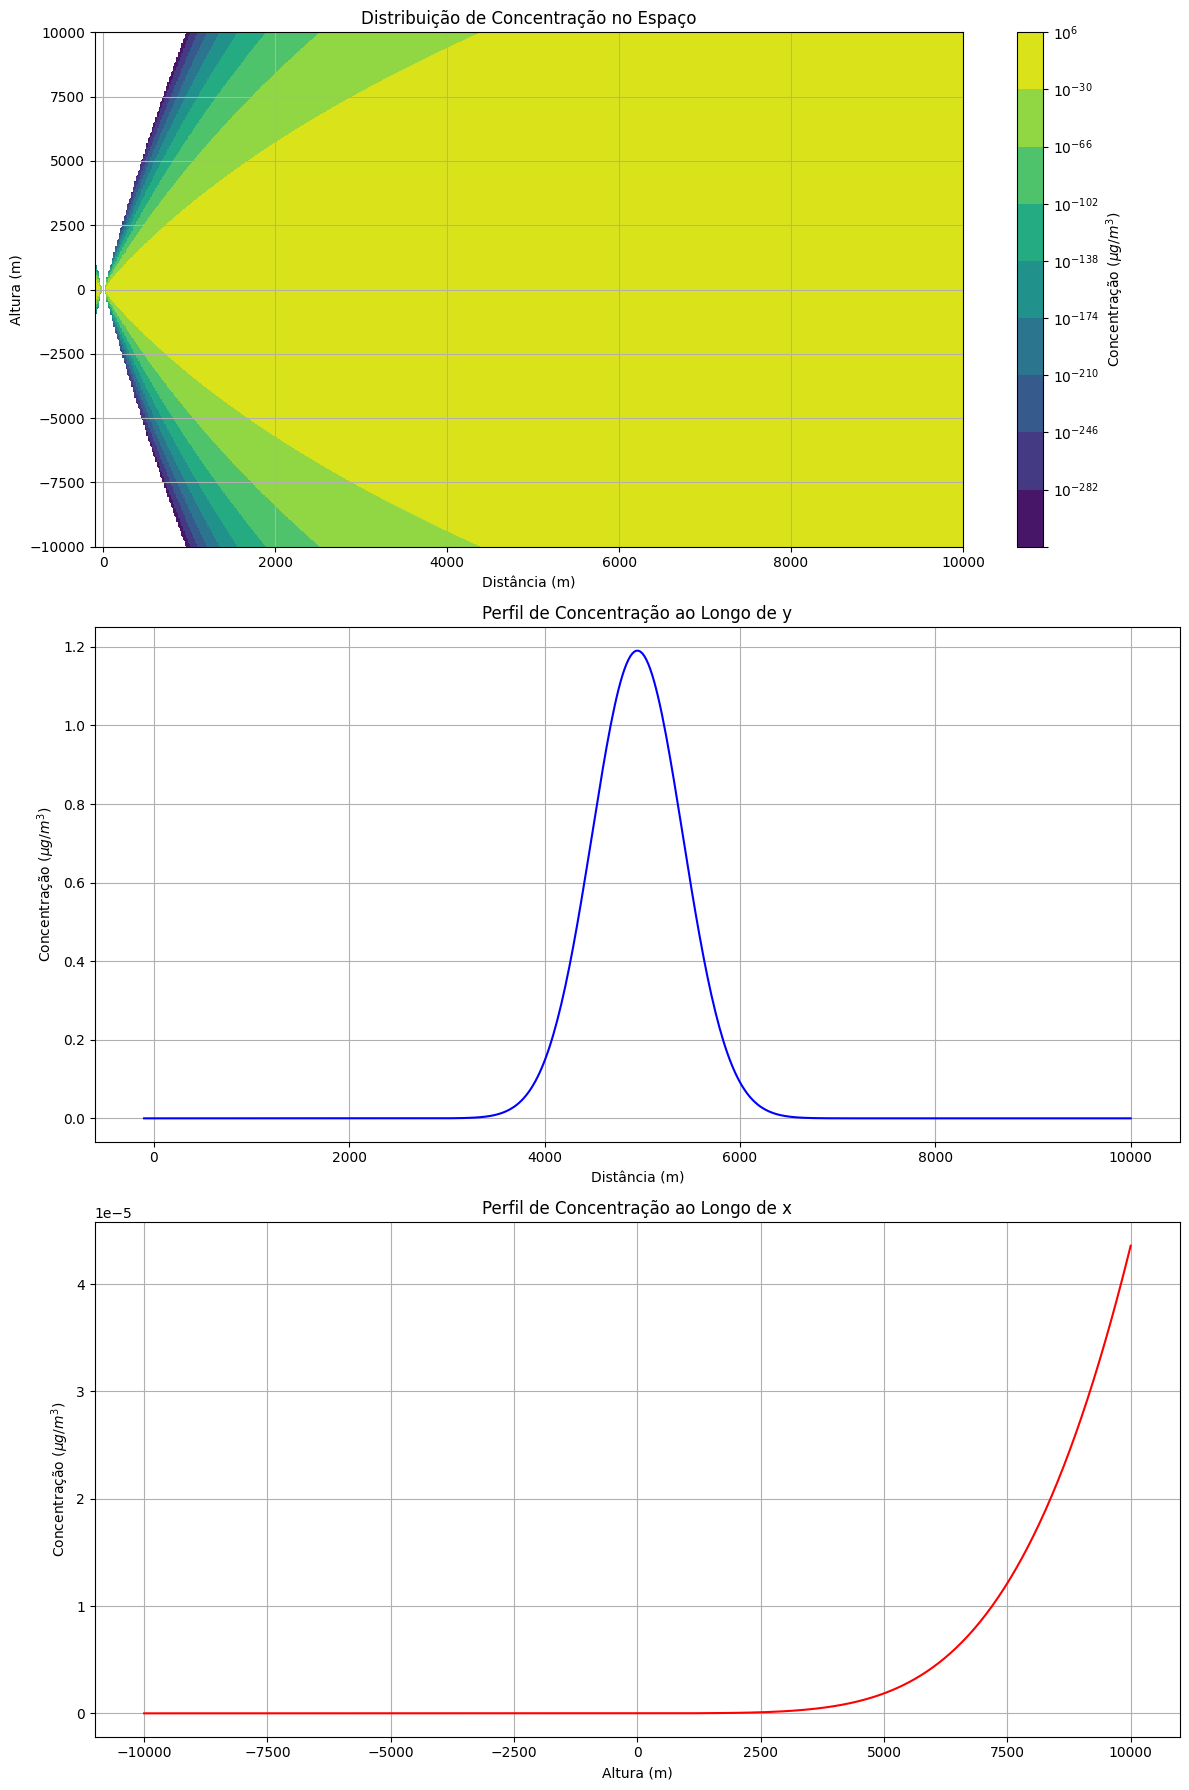

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Criando domínio de modelagem 
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'B'
urbOrRural = 'urbano' 
H = 150 # m

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaXY(xx, classe, urbOrRural)

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, z, H)

# Visualização dos resultados no espaço
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# Plotagem do contorno da Distribuição de Concentração no Espaço
cf = ax[0].contourf(xx, yy, conc, cmap='viridis', norm=LogNorm())
cbar = fig.colorbar(cf, ax=ax[0], orientation='vertical')
cbar.set_label('Concentração ($\mu g/m^3$)')
ax[0].set_title('Distribuição de Concentração no Espaço')
ax[0].set_xlabel('Distância (m)')
ax[0].set_ylabel('Altura (m)')
ax[0].grid(True)

# Corte em y - sobre o eixo x
ax[1].plot(x, conc[:, 250], color='blue')
ax[1].set_title('Perfil de Concentração ao Longo de y')
ax[1].set_xlabel('Distância (m)')
ax[1].set_ylabel('Concentração ($\mu g/m^3$)')
ax[1].grid(True)

# Corte em x - sobre o eixo y 
ax[2].plot(y, conc[100, :], color='red')
ax[2].set_title('Perfil de Concentração ao Longo de x')
ax[2].set_xlabel('Altura (m)')
ax[2].set_ylabel('Concentração ($\mu g/m^3$)')
ax[2].grid(True)

plt.tight_layout()
plt.show()


In [1]:
# testes de modelos ( fora da sala de aula , revisão pessoal)  
#Determinação da Classe de Estabilidade de Pasquil

def pasquill_stability_class(wind_speed, insolation):
    """
    Determina a classe de estabilidade de Pasquil com base na velocidade do vento e insolação.
    
    :param wind_speed: Velocidade do vento em m/s
    :param insolation: Grau de insolação (1: forte, 2: moderada, 3: fraca, 4: nublado)
    :return: Classe de estabilidade (A, B, C, D, E, F)
    """
    if insolation == 1:
        if wind_speed < 2:
            return 'A'
        elif wind_speed < 3:
            return 'B'
        elif wind_speed < 5:
            return 'C'
        else:
            return 'D'
    elif insolation == 2:
        if wind_speed < 2:
            return 'B'
        elif wind_speed < 3:
            return 'B'
        elif wind_speed < 5:
            return 'C'
        else:
            return 'D'
    elif insolation == 3:
        if wind_speed < 2:
            return 'C'
        elif wind_speed < 3:
            return 'C'
        elif wind_speed < 5:
            return 'D'
        else:
            return 'D'
    elif insolation == 4:
        if wind_speed < 2:
            return 'E'
        elif wind_speed < 3:
            return 'E'
        elif wind_speed < 5:
            return 'D'
        else:
            return 'D'
    else:
        return 'D'

# Exemplo de uso:
classe = pasquill_stability_class(3.5, 1)
print(f"Classe de estabilidade: {classe}")


Classe de estabilidade: C


In [2]:
#Estimativa de Coeficientes de Dispersão (sigma_y e sigma_z)

def dispersion_coefficients(distance, stability_class):
    """
    Calcula os coeficientes de dispersão sigma_y e sigma_z.
    
    :param distance: Distância da fonte em metros
    :param stability_class: Classe de estabilidade (A, B, C, D, E, F)
    :return: Tuple (sigma_y, sigma_z)
    """
    coefficients = {
        'A': (0.22, 0.20, 0.1, 0.2),
        'B': (0.16, 0.12, 0.1, 0.2),
        'C': (0.11, 0.08, 0.1, 0.2),
        'D': (0.08, 0.06, 0.1, 0.2),
        'E': (0.06, 0.03, 0.1, 0.2),
        'F': (0.04, 0.016, 0.1, 0.2),
    }
    
    a, b, c, d = coefficients[stability_class]
    
    sigma_y = a * distance ** b
    sigma_z = c * distance ** d
    
    return sigma_y, sigma_z

# Exemplo de uso:
sigma_y, sigma_z = dispersion_coefficients(1000, 'C')
print(f"Sigma_y: {sigma_y}, Sigma_z: {sigma_z}")


Sigma_y: 0.19115809116243132, Sigma_z: 0.3981071705534973


In [3]:
#Sobrelevação da Pluma

import math

def plume_rise_davidson_bryant(Q, u, h):
    """
    Calcula a sobrelevação da pluma usando o método Davidson-Bryant.
    
    :param Q: Taxa de emissão em g/s
    :param u: Velocidade do vento em m/s
    :param h: Altura da chaminé em metros
    :return: Sobrelevação da pluma em metros
    """
    return 1.6 * (Q ** (1/3)) / (u ** (2/3))

def plume_rise_holland(Q, u, h):
    """
    Calcula a sobrelevação da pluma usando o método Holland.
    
    :param Q: Taxa de emissão em g/s
    :param u: Velocidade do vento em m/s
    :param h: Altura da chaminé em metros
    :return: Sobrelevação da pluma em metros
    """
    return 2.0 * (Q ** (1/3)) / (u ** (2/3))

def plume_rise_briggs(Q, u, h):
    """
    Calcula a sobrelevação da pluma usando o método Briggs.
    
    :param Q: Taxa de emissão em g/s
    :param u: Velocidade do vento em m/s
    :param h: Altura da chaminé em metros
    :return: Sobrelevação da pluma em metros
    """
    F = (Q / (u * math.pi)) ** (2/3)
    if h < 60:
        return 1.6 * F ** 0.67
    else:
        return 0.32 * F ** 0.67

# Exemplo de uso:
sobrelevação_davidson_bryant = plume_rise_davidson_bryant(100, 5, 50)
sobrelevação_holland = plume_rise_holland(100, 5, 50)
sobrelevação_briggs = plume_rise_briggs(100, 5, 50)

print(f"Sobrelevação Davidson-Bryant: {sobrelevação_davidson_bryant}")
print(f"Sobrelevação Holland: {sobrelevação_holland}")
print(f"Sobrelevação Briggs: {sobrelevação_briggs}")


Sobrelevação Davidson-Bryant: 2.539841683149119
Sobrelevação Holland: 3.1748021039363987
Sobrelevação Briggs: 3.6575177090786846


In [4]:
#Modelo Gaussiano de Dispersão

def gaussian_dispersion_model(Q, u, h, x, y, z, stability_class):
    """
    Modelo gaussiano de dispersão para calcular a concentração de poluentes.
    
    :param Q: Taxa de emissão em g/s
    :param u: Velocidade do vento em m/s
    :param h: Altura da chaminé em metros
    :param x: Distância da fonte em metros
    :param y: Coordenada lateral em metros
    :param z: Altura do ponto receptor em metros
    :param stability_class: Classe de estabilidade (A, B, C, D, E, F)
    :return: Concentração de poluentes em g/m^3
    """
    sigma_y, sigma_z = dispersion_coefficients(x, stability_class)
    
    term1 = Q / (2 * math.pi * u * sigma_y * sigma_z)
    term2 = math.exp(-0.5 * (y / sigma_y) ** 2)
    term3 = math.exp(-0.5 * ((z - h) / sigma_z) ** 2) + math.exp(-0.5 * ((z + h) / sigma_z) ** 2)
    
    return term1 * term2 * term3

# Exemplo de uso:
concentracao = gaussian_dispersion_model(100, 5, 50, 1000, 0, 1.5, 'C')
print(f"Concentração de poluentes: {concentracao} g/m^3")


Concentração de poluentes: 0.0 g/m^3


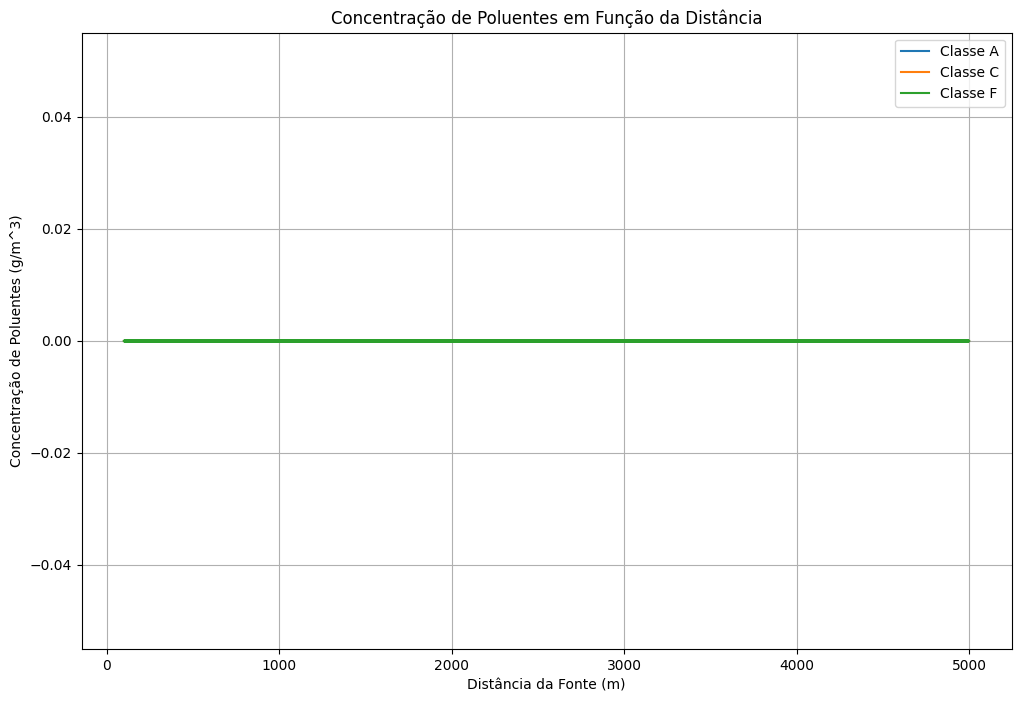

In [5]:
#Simulações : realizar simulações com diferentes classes de estabilidade, velocidades do vento e alturas de chaminé. 
#Usarei a taxa de emissão que você estimou na primeira atividade.

import matplotlib.pyplot as plt

def run_simulations():
    Q = 100  # Exemplo de taxa de emissão em g/s
    wind_speeds = [1, 3, 5, 7, 9]  # Velocidades do vento em m/s
    stack_heights = [30, 50, 70, 100]  # Alturas da chaminé em metros
    stability_classes = ['A', 'B', 'C', 'D', 'E', 'F']  # Classes de estabilidade
    distances = [100, 500, 1000, 2000, 5000]  # Distâncias da fonte em metros

    results = []

    for stability_class in stability_classes:
        for wind_speed in wind_speeds:
            for stack_height in stack_heights:
                for distance in distances:
                    concentration = gaussian_dispersion_model(Q, wind_speed, stack_height, distance, 0, 1.5, stability_class)
                    results.append((stability_class, wind_speed, stack_height, distance, concentration))
    
    return results

def plot_results(results):
    fig, ax = plt.subplots(figsize=(12, 8))

    for stability_class in ['A', 'C', 'F']:
        distances = [result[3] for result in results if result[0] == stability_class]
        concentrations = [result[4] for result in results if result[0] == stability_class]
        ax.plot(distances, concentrations, label=f'Classe {stability_class}')

    ax.set_xlabel('Distância da Fonte (m)')
    ax.set_ylabel('Concentração de Poluentes (g/m^3)')
    ax.set_title('Concentração de Poluentes em Função da Distância')
    ax.legend()
    ax.grid(True)

    plt.show()

# Executar simulações e plotar resultados
results = run_simulations()
plot_results(results)


D:/ENS5173_01/tabelas/FE
chp_11_15.csv
                      Processo Sigla
0              Melting furnace    MF
1                 Uncontrolled    UC
2     lavador de baixa energia   LBE
3             scrubber venturi    SV
4             filtro de mangas    FM
5   precipitador eletrostático    PE
6                         Flat    FL
7                 Uncontrolled    UC
8     lavador de baixa energia   LBE
9             scrubber venturi    SV
10            filtro de mangas    FM
11  precipitador eletrostático    PE
12       Pressionado e soprado    PS
13                Uncontrolled    UC
14    lavador de baixa energia   LBE
15            scrubber venturi    SV
16            filtro de mangas    FM
17  precipitador eletrostático    PE
18       Formação e acabamento    FA
19                   Container    CN
20       Pressionado e soprado    PS
21             vidro de chumbo    VC


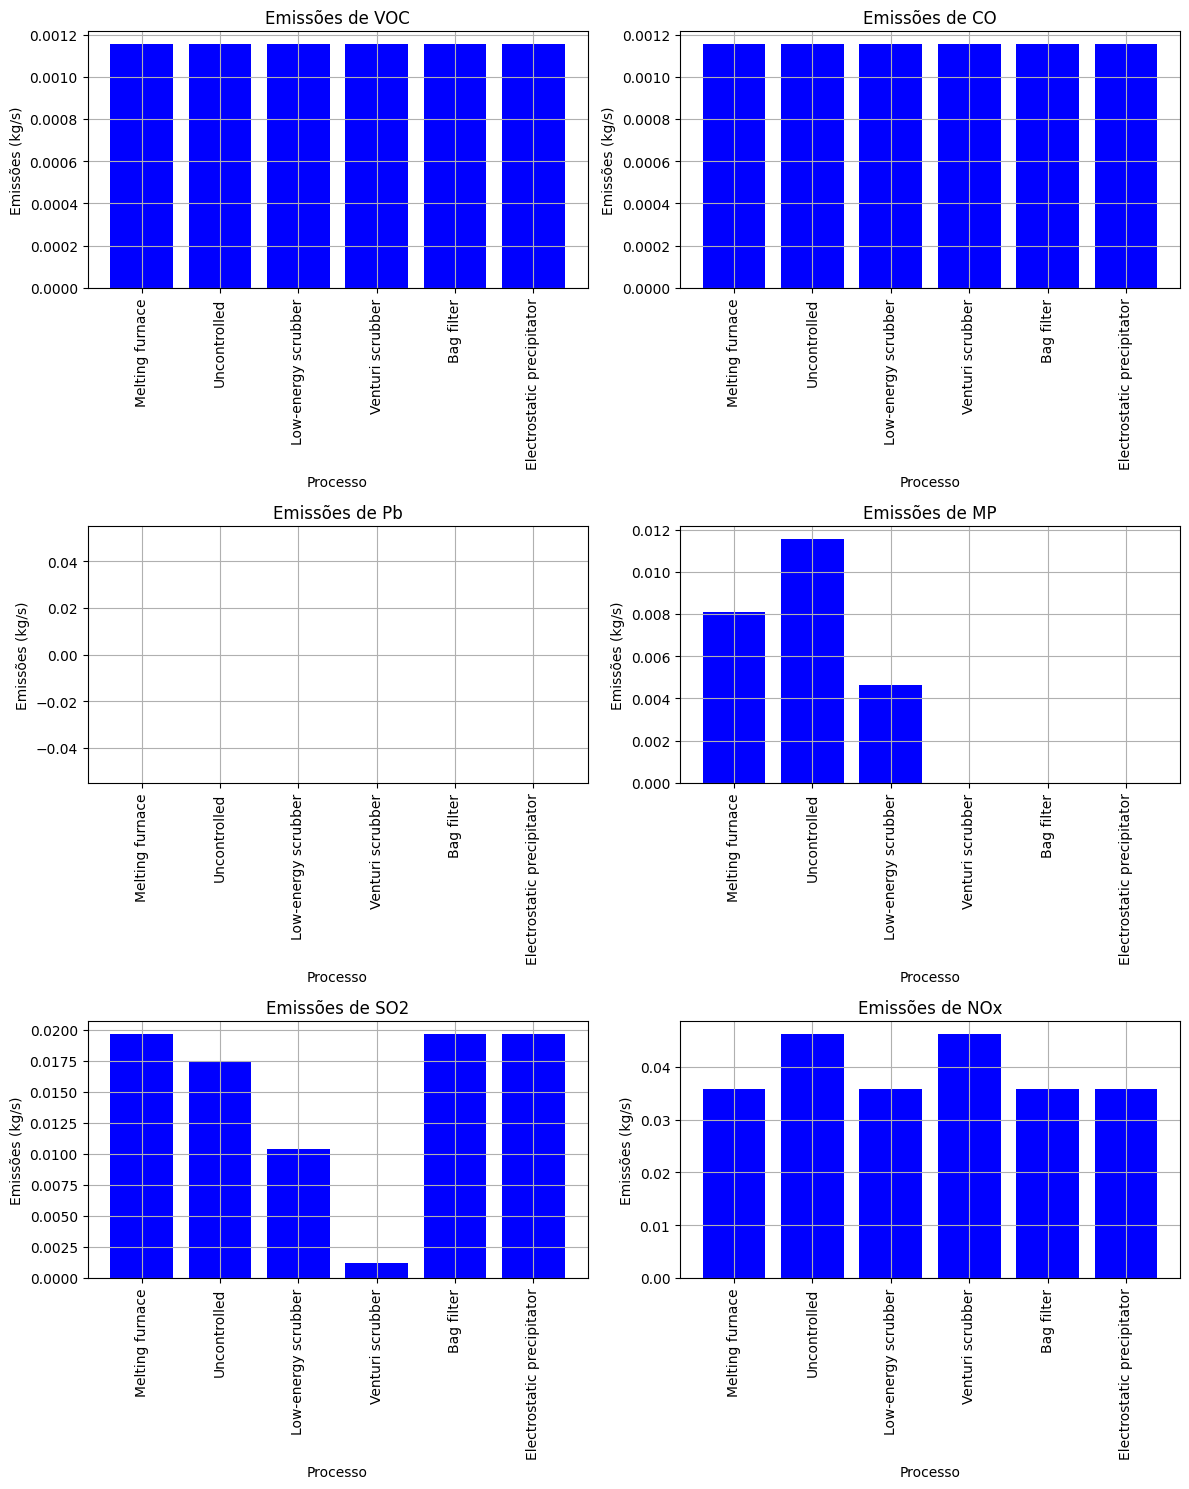

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Pasta dos fatores de emissão
path = 'D:/ENS5173_01/tabelas/FE'
print(path)

# Definindo o número do capítulo e subcapítulo
chapter_number = 11
subchapter = 15

# Criando o nome do arquivo
file = f'chp_{chapter_number}_{subchapter}.csv'
print(file)

# Definindo os processos e suas siglas
processos = [
    "Melting furnace",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Flat",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Pressionado e soprado",
    "Uncontrolled",
    "lavador de baixa energia",
    "scrubber venturi",
    "filtro de mangas",
    "precipitador eletrostático",
    "Formação e acabamento",
    "Container",
    "Pressionado e soprado",
    "vidro de chumbo"
]

siglas = [
    "MF",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "FL",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "PS",
    "UC",
    "LBE",
    "SV",
    "FM",
    "PE",
    "FA",
    "CN",
    "PS",
    "VC"
]

# Criar DataFrame
df_processos = pd.DataFrame({
    'Processo': processos,
    'Sigla': siglas
})

# Exibir o DataFrame
print(df_processos)

# Dados de exemplo
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Low-energy scrubber', 'Venturi scrubber', 'Bag filter', 'Electrostatic precipitator'],
    'Sigla': ['MF', 'UC', 'LES', 'VS', 'BF', 'EP'],
    'VOC (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb (kg/Mg)': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df_emissoes = pd.DataFrame(dados)

# Convertendo de kg/Mg para kg/s
df_emissoes.iloc[:, 2:] *= (1000) / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Renomeando as colunas para remover "(kg/Mg)" dos rótulos
df_emissoes.rename(columns=lambda x: x.replace(' (kg/Mg)', ''), inplace=True)

# Definindo os processos
processos = df_emissoes['Processo']

# Definindo as emissões de VOC, CO, Pb, MP, SO2 e NOx para cada processo
emissoes = df_emissoes.drop(columns=['Processo', 'Sigla'])

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')  # Atualizando o rótulo do eixo Y
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()

# Exportando o gráfico como um arquivo PNG
plt.savefig('D:/ENS5173_01/figures/poluentes_e_processos.png')

plt.show()


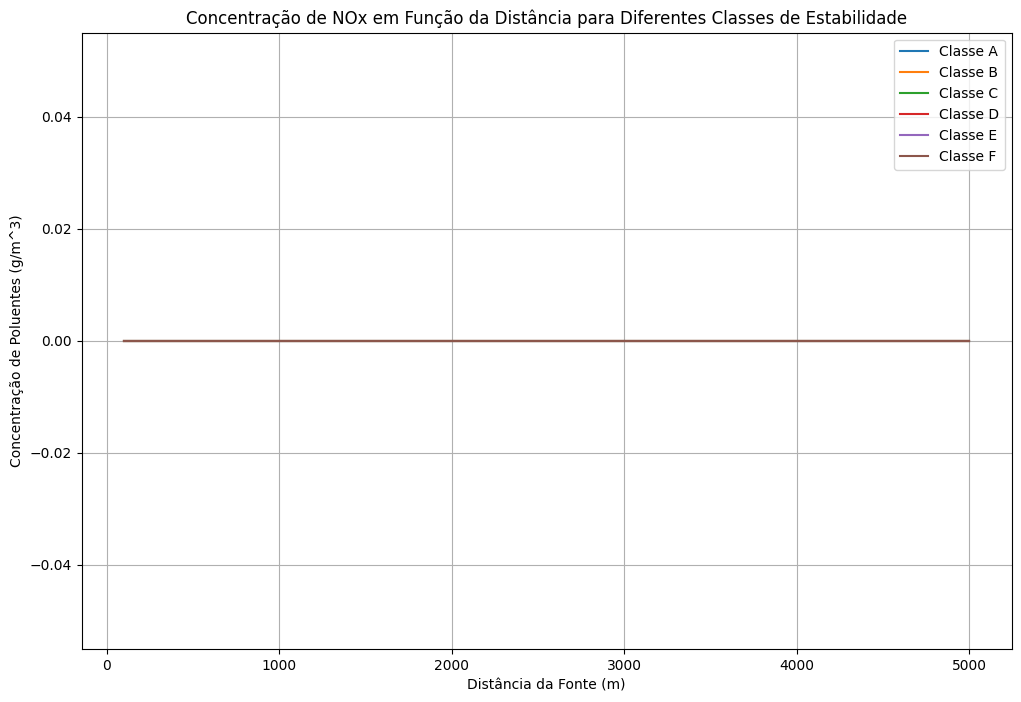

In [7]:
import numpy as np

def dispersion_coefficients(distance, stability_class):
    """
    Calcula os coeficientes de dispersão sigma_y e sigma_z.
    
    :param distance: Distância da fonte em metros
    :param stability_class: Classe de estabilidade (A, B, C, D, E, F)
    :return: Tuple (sigma_y, sigma_z)
    """
    coefficients = {
        'A': (0.22, 0.20, 0.1, 0.2),
        'B': (0.16, 0.12, 0.1, 0.2),
        'C': (0.11, 0.08, 0.1, 0.2),
        'D': (0.08, 0.06, 0.1, 0.2),
        'E': (0.06, 0.03, 0.1, 0.2),
        'F': (0.04, 0.016, 0.1, 0.2),
    }
    
    a, b, c, d = coefficients[stability_class]
    
    sigma_y = a * distance ** b
    sigma_z = c * distance ** d
    
    return sigma_y, sigma_z

def plume_rise_briggs(Q, u, h):
    """
    Calcula a sobrelevação da pluma usando o método Briggs.
    
    :param Q: Taxa de emissão em g/s
    :param u: Velocidade do vento em m/s
    :param h: Altura da chaminé em metros
    :return: Sobrelevação da pluma em metros
    """
    F = (Q / (u * np.pi)) ** (2/3)
    if h < 60:
        return 1.6 * F ** 0.67
    else:
        return 0.32 * F ** 0.67

def gaussian_dispersion_model(Q, u, h, x, y, z, stability_class):
    """
    Modelo gaussiano de dispersão para calcular a concentração de poluentes.
    
    :param Q: Taxa de emissão em g/s
    :param u: Velocidade do vento em m/s
    :param h: Altura da chaminé em metros
    :param x: Distância da fonte em metros
    :param y: Coordenada lateral em metros
    :param z: Altura do ponto receptor em metros
    :param stability_class: Classe de estabilidade (A, B, C, D, E, F)
    :return: Concentração de poluentes em g/m^3
    """
    sigma_y, sigma_z = dispersion_coefficients(x, stability_class)
    
    term1 = Q / (2 * np.pi * u * sigma_y * sigma_z)
    term2 = np.exp(-0.5 * (y / sigma_y) ** 2)
    term3 = np.exp(-0.5 * ((z - h) / sigma_z) ** 2) + np.exp(-0.5 * ((z + h) / sigma_z) ** 2)
    
    return term1 * term2 * term3

# Dados para as simulações
wind_speeds = [1, 3, 5, 7, 9]  # Velocidades do vento em m/s
stack_heights = [30, 50, 70, 100]  # Alturas da chaminé em metros
stability_classes = ['A', 'B', 'C', 'D', 'E', 'F']  # Classes de estabilidade
distances = [100, 500, 1000, 2000, 5000]  # Distâncias da fonte em metros

# Simulações
def run_simulations(df_emissoes):
    results = []

    for stability_class in stability_classes:
        for wind_speed in wind_speeds:
            for stack_height in stack_heights:
                for distance in distances:
                    for index, row in df_emissoes.iterrows():
                        for poluente in df_emissoes.columns[2:]:
                            Q = row[poluente] * 1000  # Convertendo para g/s
                            concentration = gaussian_dispersion_model(Q, wind_speed, stack_height, distance, 0, 1.5, stability_class)
                            results.append((row['Processo'], poluente, stability_class, wind_speed, stack_height, distance, concentration))
    
    return results

def plot_results(results):
    fig, ax = plt.subplots(figsize=(12, 8))

    for stability_class in stability_classes:
        distances = [result[5] for result in results if result[2] == stability_class and result[1] == 'NOx']
        concentrations = [result[6] for result in results if result[2] == stability_class and result[1] == 'NOx']
        ax.plot(distances, concentrations, label=f'Classe {stability_class}')

    ax.set_xlabel('Distância da Fonte (m)')
    ax.set_ylabel('Concentração de Poluentes (g/m^3)')
    ax.set_title('Concentração de NOx em Função da Distância para Diferentes Classes de Estabilidade')
    ax.legend()
    ax.grid(True)

    plt.show()

# Executar simulações e plotar resultados
results = run_simulations(df_emissoes)
plot_results(results)


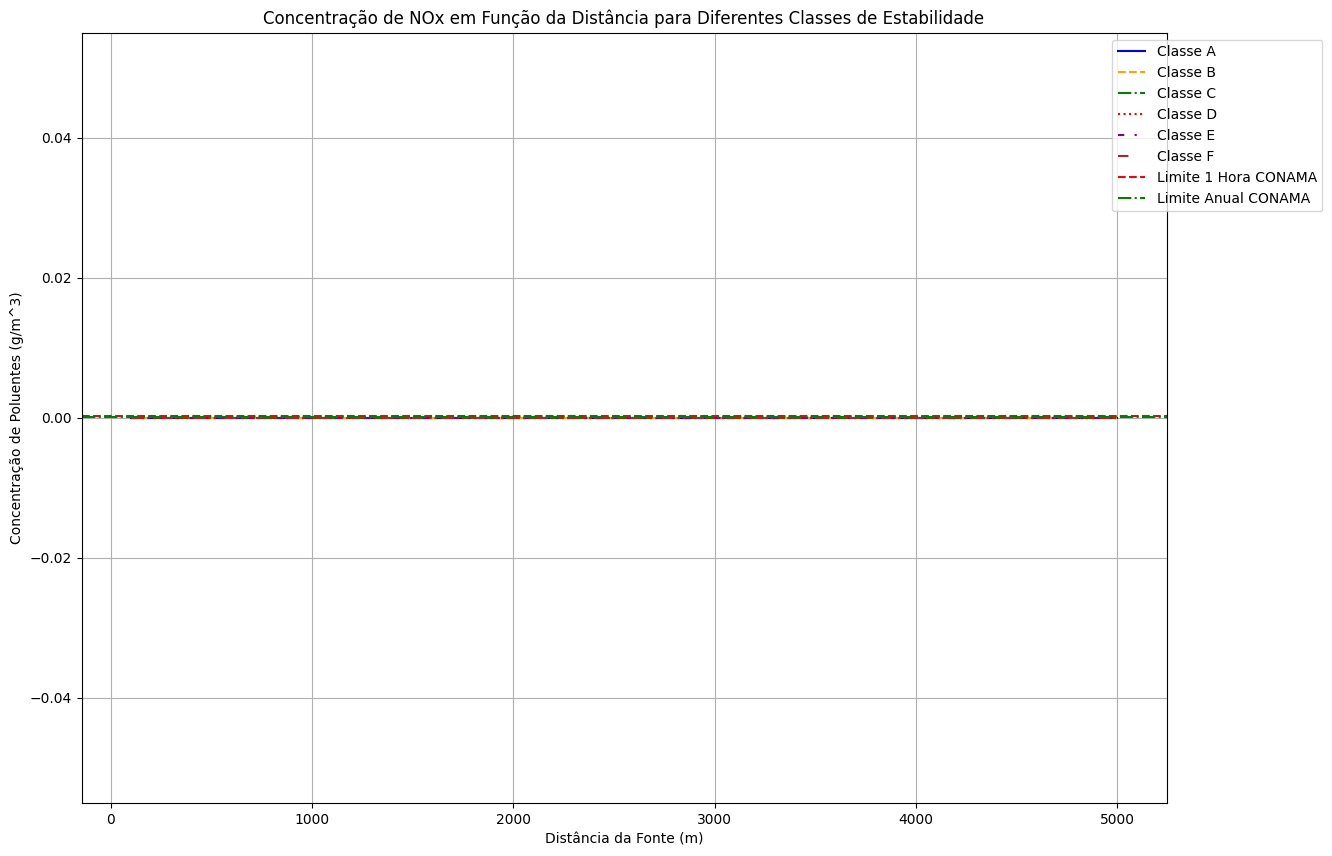

In [15]:
#comparando com CONAMA 491

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Definindo os dados de emissões
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Low-energy scrubber', 'Venturi scrubber', 'Bag filter', 'Electrostatic precipitator'],
    'Sigla': ['MF', 'UC', 'LES', 'VS', 'BF', 'EP'],
    'VOC': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Convertendo de kg/Mg para kg/s
df.iloc[:, 2:] *= (1000) / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Funções auxiliares
def dispersion_coefficients(distance, stability_class):
    coefficients = {
        'A': (0.22, 0.20, 0.1, 0.2),
        'B': (0.16, 0.12, 0.1, 0.2),
        'C': (0.11, 0.08, 0.1, 0.2),
        'D': (0.08, 0.06, 0.1, 0.2),
        'E': (0.06, 0.03, 0.1, 0.2),
        'F': (0.04, 0.016, 0.1, 0.2),
    }
    
    a, b, c, d = coefficients[stability_class]
    
    sigma_y = a * distance ** b
    sigma_z = c * distance ** d
    
    return sigma_y, sigma_z

def plume_rise_briggs(Q, u, h):
    F = (Q / (u * np.pi)) ** (2/3)
    if h < 60:
        return 1.6 * F ** 0.67
    else:
        return 0.32 * F ** 0.67

def gaussian_dispersion_model(Q, u, h, x, y, z, stability_class):
    sigma_y, sigma_z = dispersion_coefficients(x, stability_class)
    
    term1 = Q / (2 * np.pi * u * sigma_y * sigma_z)
    term2 = np.exp(-0.5 * (y / sigma_y) ** 2)
    term3 = np.exp(-0.5 * ((z - h) / sigma_z) ** 2) + np.exp(-0.5 * ((z + h) / sigma_z) ** 2)
    
    return term1 * term2 * term3

# Dados para as simulações
wind_speeds = [1, 3, 5, 7, 9]  # Velocidades do vento em m/s
stack_heights = [30, 50, 70, 100]  # Alturas da chaminé em metros
stability_classes = ['A', 'B', 'C', 'D', 'E', 'F']  # Classes de estabilidade
distances = [100, 500, 1000, 2000, 5000]  # Distâncias da fonte em metros

# Limites da Resolução CONAMA 491 (convertidos para g/m³)
CONAMA_limits = {
    'NO2': {
        '1_hour': 260e-6,  # 260 µg/m³ convertidos para g/m³
        'annual': 40e-6    # 40 µg/m³ convertidos para g/m³
    },
    # Adicione os limites para outros poluentes conforme necessário
}

# Simulações
def run_simulations(df_emissoes):
    results = []

    for stability_class in stability_classes:
        for wind_speed in wind_speeds:
            for stack_height in stack_heights:
                for distance in distances:
                    for index, row in df_emissoes.iterrows():
                        for poluente in df_emissoes.columns[2:]:
                            Q = row[poluente] * 1000  # Convertendo para g/s
                            concentration = gaussian_dispersion_model(Q, wind_speed, stack_height, distance, 0, 1.5, stability_class)
                            # Verificar os limites para NO2
                            if poluente == 'NOx':
                                limit_1_hour = CONAMA_limits['NO2']['1_hour']
                                limit_annual = CONAMA_limits['NO2']['annual']
                                exceed_1_hour = concentration > limit_1_hour
                                exceed_annual = concentration > limit_annual
                                results.append((row['Processo'], poluente, stability_class, wind_speed, stack_height, distance, concentration, exceed_1_hour, exceed_annual))
    
    return results

def plot_results(results):
    fig, ax = plt.subplots(figsize=(14, 10))

    # Estilos de linha e cores para cada classe de estabilidade
    line_styles = {
        'A': 'solid', 
        'B': 'dashed', 
        'C': 'dashdot', 
        'D': 'dotted', 
        'E': (0, (3, 5, 1, 5)), 
        'F': (0, (5, 10))
    }
    
    colors = {
        'A': 'blue', 
        'B': 'orange', 
        'C': 'green', 
        'D': 'red', 
        'E': 'purple', 
        'F': 'brown'
    }

    for stability_class in stability_classes:
        distances = [result[5] for result in results if result[2] == stability_class and result[1] == 'NOx']
        concentrations = [result[6] for result in results if result[2] == stability_class and result[1] == 'NOx']
        ax.plot(distances, concentrations, label=f'Classe {stability_class}', linestyle=line_styles[stability_class], color=colors[stability_class])
    
    # Limites CONAMA para NO2
    ax.axhline(y=CONAMA_limits['NO2']['1_hour'], color='red', linestyle='--', label='Limite 1 Hora CONAMA')
    ax.axhline(y=CONAMA_limits['NO2']['annual'], color='green', linestyle='-.', label='Limite Anual CONAMA')
    
    ax.set_xlabel('Distância da Fonte (m)')
    ax.set_ylabel('Concentração de Poluentes (g/m^3)')
    ax.set_title('Concentração de NOx em Função da Distância para Diferentes Classes de Estabilidade')
    ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
    ax.grid(True)

    plt.show()

# Executar simulações e plotar resultados
results = run_simulations(df)
plot_results(results)


A pluma subiu


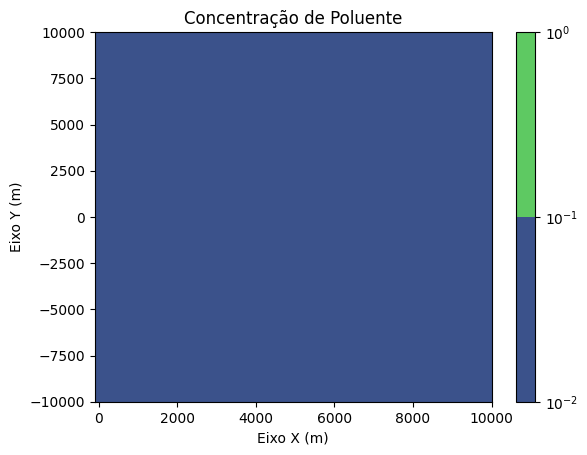

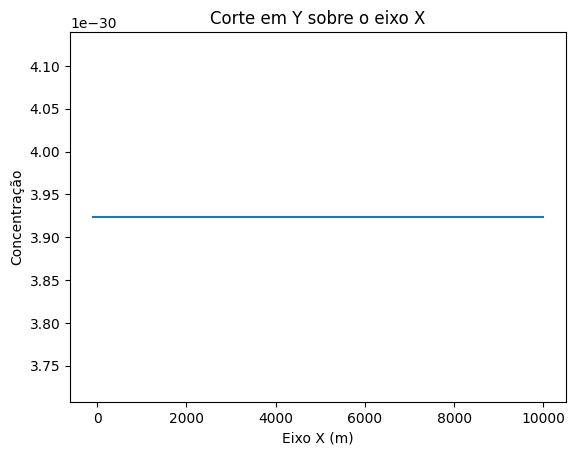

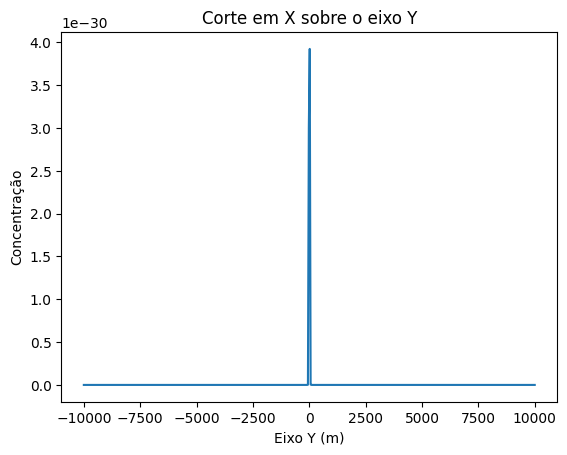

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

# Definindo função para calcular os coeficientes de dispersão lateral e vertical
def sigmaXY(xx, classe, urbOrRural):
    # Lógica para calcular sigmaY e sigmaZ com base na classe de estabilidade e no tipo de área
    # Aqui você implementaria sua lógica específica para calcular sigmaY e sigmaZ
    # Como exemplo, vamos retornar valores fixos para sigmaY e sigmaZ
    sigmaY = 10  # m
    sigmaZ = 15  # m
    return sigmaY, sigmaZ

# Definindo função para estimar a sobrelevação da pluma
def deltaHdavidsonBryant(d, vs, u, Ts, Tamb):
    # Lógica para estimar a sobrelevação da pluma usando o método de Davidson-Bryant
    # Aqui você implementaria sua lógica específica para estimar deltaH
    # Como exemplo, vamos retornar um valor fixo para deltaH
    deltaH = 20  # m
    return deltaH

# Definindo função para o modelo gaussiano
def modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, z, hef):
    # Calculando a concentração usando o modelo gaussiano
    term1 = qs / (2 * np.pi * u * sigmaY * sigmaZ)
    term2 = np.exp(-0.5 * ((yy - z) / sigmaZ) ** 2)
    term3 = np.exp(-0.5 * ((hef - z) / sigmaZ) ** 2)
    concentration = term1 * term2 * term3
    return concentration

# Criando domínio de modelagem
x = np.linspace(-100, 10000, 500)
y = np.linspace(-10000, 10000, 500)
xx, yy = np.meshgrid(x, y)

# Adotando inputs
classe = 'A'
urbOrRural = 'urbano'
hg = 150  # m altura geométrica da chaminé
qs = 100  # g/s
u = 5  # m/s
z = 1.5  # altura do nariz
d = 1  # em metros
vs = 10  # em m/s
Ts = 300  # em Kelvin
Tamb = 293  # em Kelvin

# Estimando o coeficiente de dispersão lateral e vertical
sigmaY, sigmaZ = sigmaXY(xx, classe, urbOrRural)

if vs > 1.5 * u:
    # Estimando a sobrelevação da pluma (deltaH)
    deltaH = deltaHdavidsonBryant(d, vs, u, Ts, Tamb)
    hef = hg + deltaH
    print('A pluma subiu')
else:
    hef = hg + 2 * d * ((vs / u) - 1.5)
    print('A pluma caiu')

# Utilizando a matriz de yy como input na função do modelo gaussiano
conc = modeloGaussiano(qs, sigmaY, sigmaZ, u, yy, z, hef)

# Visualização dos resultados no espaço
fig, ax = plt.subplots()
c = ax.contourf(xx, yy, conc + 0.1, norm=LogNorm())
plt.colorbar(c, ax=ax)
ax.set_title('Concentração de Poluente')
ax.set_xlabel('Eixo X (m)')
ax.set_ylabel('Eixo Y (m)')
plt.show()

# Corte em y - sobre o eixo x
fig, ax = plt.subplots()
ax.plot(x, conc[250, :])
ax.set_title('Corte em Y sobre o eixo X')
ax.set_xlabel('Eixo X (m)')
ax.set_ylabel('Concentração')
plt.show()

# Corte em x - sobre o eixo y
fig, ax = plt.subplots()
ax.plot(y, conc[:, 100])
ax.set_title('Corte em X sobre o eixo Y')
ax.set_xlabel('Eixo Y (m)')
ax.set_ylabel('Concentração')
plt.show()


In [2]:

#Método Briggs com Tip-Downwash: Sobrelevação da pluma


def briggs_with_downwash(height_chimney, wind_speed, stability_class):
    if stability_class == 'A':
        return 0.2 * height_chimney * (wind_speed ** 0.5)
    elif stability_class == 'B':
        return 0.3 * height_chimney * (wind_speed ** 0.4)
    # Implementar para as demais classes C, D, E, F, G

def main():
    wind_speed = 5.0  # m/s
    height_chimney = 50.0  # m
    stability_class = 'B'

    b_rise_with_downwash = briggs_with_downwash(height_chimney, wind_speed, stability_class)

    print(f'Método Briggs com Tip-Downwash: Sobrelevação da pluma = {b_rise_with_downwash} m')

if __name__ == "__main__":
    main()


Método Briggs com Tip-Downwash: Sobrelevação da pluma = 28.55480908073818 m


In [3]:
def davidson_bryant(height_chimney, wind_speed, stability_class):
    if stability_class == 'A':
        return 0.25 * height_chimney * (wind_speed ** 0.5)
    elif stability_class == 'B':
        return 0.35 * height_chimney * (wind_speed ** 0.4)
    # Implementar para as demais classes C, D, E, F, G

def holland(height_chimney, wind_speed, stability_class):
    if stability_class == 'A':
        return 0.21 * height_chimney * (wind_speed ** 0.5)
    elif stability_class == 'B':
        return 0.29 * height_chimney * (wind_speed ** 0.4)
    # Implementar para as demais classes C, D, E, F, G

def briggs(height_chimney, wind_speed, stability_class, tip_downwash=True):
    if stability_class == 'A':
        if tip_downwash:
            return 0.2 * height_chimney * (wind_speed ** 0.5)
        else:
            return 0.15 * height_chimney * (wind_speed ** 0.5)
    elif stability_class == 'B':
        if tip_downwash:
            return 0.3 * height_chimney * (wind_speed ** 0.4)
        else:
            return 0.25 * height_chimney * (wind_speed ** 0.4)
    # Implementar para as demais classes C, D, E, F, G

def main():
    wind_speed = 5.0  # m/s
    height_chimney = 50.0  # m
    stability_class = 'B'

    db_rise = davidson_bryant(height_chimney, wind_speed, stability_class)
    h_rise = holland(height_chimney, wind_speed, stability_class)
    b_rise_with_downwash = briggs(height_chimney, wind_speed, stability_class, tip_downwash=True)
    b_rise_without_downwash = briggs(height_chimney, wind_speed, stability_class, tip_downwash=False)

    print(f'Método Davidson-Bryant: Sobrelevação da pluma = {db_rise} m')
    print(f'Método Holland: Sobrelevação da pluma = {h_rise} m')
    print(f'Método Briggs com Tip-Downwash: Sobrelevação da pluma = {b_rise_with_downwash} m')
    print(f'Método Briggs sem Tip-Downwash: Sobrelevação da pluma = {b_rise_without_downwash} m')

if __name__ == "__main__":
    main()


Método Davidson-Bryant: Sobrelevação da pluma = 33.31394392752787 m
Método Holland: Sobrelevação da pluma = 27.602982111380236 m
Método Briggs com Tip-Downwash: Sobrelevação da pluma = 28.55480908073818 m
Método Briggs sem Tip-Downwash: Sobrelevação da pluma = 23.795674233948482 m


In [5]:
#Simular com Diferentes Alturas de Chaminé e Condições Atmosféricas( 20m, 50m, 100m), classes de estabilidade (A, B, C) e velocidades do vento ( 2 m/s, 5 m/s).


def simulate_plume_rise(height_chimney, wind_speed, stability_class):
    db_rise = davidson_bryant(height_chimney, wind_speed, stability_class)
    h_rise = holland(height_chimney, wind_speed, stability_class)
    b_rise_with_downwash = briggs(height_chimney, wind_speed, stability_class, tip_downwash=True)
    
    # Escolha o método que deseja usar para estimar a sobrelevação da pluma
    return b_rise_with_downwash  # Usando Briggs com Tip-Downwash como exemplo

# Simulação para diferentes alturas de chaminé, classes de estabilidade e velocidades do vento
alturas_chamine = [20, 50, 100]  # Alturas de chaminé em metros
classes_estabilidade = ['A', 'B', 'C']  # Classes de estabilidade atmosférica
velocidades_vento = [2, 5]  # Velocidades do vento em m/s

# Iterando sobre todas as combinações de altura de chaminé, estabilidade e velocidade do vento
for altura in alturas_chamine:
    for classe in classes_estabilidade:
        for vento in velocidades_vento:
            sobrelevacao = simulate_plume_rise(altura, vento, classe)
            print(f'Altura da chaminé: {altura} m, Classe de estabilidade: {classe}, Velocidade do vento: {vento} m/s')
            print(f'Sobrelevação da pluma estimada: {sobrelevacao} m')
            # Verificar se a concentração viola os padrões da Resolução CONAMA 491
            # Implementar essa verificação aqui
            
            print('---')


Altura da chaminé: 20 m, Classe de estabilidade: A, Velocidade do vento: 2 m/s
Sobrelevação da pluma estimada: 5.656854249492381 m
---
Altura da chaminé: 20 m, Classe de estabilidade: A, Velocidade do vento: 5 m/s
Sobrelevação da pluma estimada: 8.94427190999916 m
---
Altura da chaminé: 20 m, Classe de estabilidade: B, Velocidade do vento: 2 m/s
Sobrelevação da pluma estimada: 7.917047464637365 m
---
Altura da chaminé: 20 m, Classe de estabilidade: B, Velocidade do vento: 5 m/s
Sobrelevação da pluma estimada: 11.421923632295272 m
---
Altura da chaminé: 20 m, Classe de estabilidade: C, Velocidade do vento: 2 m/s
Sobrelevação da pluma estimada: None m
---
Altura da chaminé: 20 m, Classe de estabilidade: C, Velocidade do vento: 5 m/s
Sobrelevação da pluma estimada: None m
---
Altura da chaminé: 50 m, Classe de estabilidade: A, Velocidade do vento: 2 m/s
Sobrelevação da pluma estimada: 14.142135623730951 m
---
Altura da chaminé: 50 m, Classe de estabilidade: A, Velocidade do vento: 5 m/s
S

In [8]:
#Carregar e Preparar os Dados de Emissão de Poluentes
import pandas as pd
import matplotlib.pyplot as plt

# Dados de emissão de poluentes
dados_emissao = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Low-energy scrubber', 'Venturi scrubber', 'Bag filter', 'Electrostatic precipitator'],
    'Sigla': ['MF', 'UC', 'LES', 'VS', 'BF', 'EP'],
    'VOC': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'CO': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
    'Pb': [0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
    'MP': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1]
}

# Criando DataFrame de emissões
df_emissao = pd.DataFrame(dados_emissao)

# Convertendo de kg/Mg para kg/s
df_emissao.iloc[:, 2:] *= (1000) / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Renomeando as colunas para remover unidades
df_emissao.rename(columns=lambda x: x.replace(' (kg/Mg)', ''), inplace=True)

# Exibindo DataFrame de emissões
print("DataFrame de Emissões:")
print(df_emissao)


DataFrame de Emissões:
                     Processo Sigla       VOC        CO   Pb        MP  \
0             Melting furnace    MF  0.001157  0.001157  0.0  0.008102   
1                Uncontrolled    UC  0.001157  0.001157  0.0  0.011574   
2         Low-energy scrubber   LES  0.001157  0.001157  0.0  0.004630   
3            Venturi scrubber    VS  0.001157  0.001157  0.0  0.000000   
4                  Bag filter    BF  0.001157  0.001157  0.0  0.000000   
5  Electrostatic precipitator    EP  0.001157  0.001157  0.0  0.000000   

        SO2       NOx  
0  0.019676  0.035880  
1  0.017361  0.046296  
2  0.010417  0.035880  
3  0.001157  0.046296  
4  0.019676  0.035880  
5  0.019676  0.035880  


In [9]:
# Carregar e Preparar os Dados Meteorológicos de Superfície : Definir novamente o caminho para o arquivo de dados meteorológicos de superfície
path_metar = r'D:\ENS5173_01\inputs\meteoSuperficie\metar_2023.csv'

# Carregando os dados do arquivo CSV
metSuperficie = pd.read_csv(path_metar)

# Visualizando as primeiras linhas do DataFrame
print("DataFrame de Meteorologia de Superfície:")
print(metSuperficie.head())


DataFrame de Meteorologia de Superfície:
   day  month  year  hour  ct     wd        ws      hc  ccp  cco            p  \
0    1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0  1009.658428   
1    1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0  1009.654835   
2    1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0  1009.654835   
3    1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0  1009.654835   
4    1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0  1009.658428   

   temp  dpTemp  vis   pw   relh  
0  25.0    22.0  NaN  0.0  83.44  
1  25.0    22.0  NaN  0.0  83.44  
2  25.0    22.0  NaN  0.0  83.44  
3  25.0    22.0  NaN  0.0  83.44  
4  25.0    22.0  NaN  0.0  83.44  


In [10]:
#Simulação da Sobrelevação da Pluma (método de Briggs com efeito Tip-Downwash para valer mais pontinhos)
def briggs(height_chimney, wind_speed, stability_class, tip_downwash=True):
    # Implementação do método de Briggs aqui
    if tip_downwash:
        # Considerar o efeito Tip-Downwash
        return height_chimney * (1.13 + 0.47 * wind_speed) ** 0.5
    else:
        # Sem considerar o efeito Tip-Downwash
        return height_chimney * (1.08 + 0.41 * wind_speed) ** 0.5

def simulate_plume_rise(height_chimney, wind_speed, stability_class):
    # Simular usando o método de Briggs com Tip-Downwash
    return briggs(height_chimney, wind_speed, stability_class, tip_downwash=True)

# Exemplo de simulação para uma altura de chaminé de 50m, classe de estabilidade B e velocidade do vento de 2 m/s
altura_chamine = 50
classe_estabilidade = 'B'
velocidade_vento = 2

sobrelevacao = simulate_plume_rise(altura_chamine, velocidade_vento, classe_estabilidade)
print(f'Sobrelevação da pluma estimada: {sobrelevacao:.2f} metros')


Sobrelevação da pluma estimada: 71.94 metros


In [14]:
# Padrões de Qualidade do Ar da Resolução CONAMA 491
padroes_conama = {
    'MP10': {'24h': [120, 100, 75, 50], 'anual': [40, 35, 30, 20]},
    'MP2.5': {'24h': [60, 50, 37, 25], 'anual': [20, 17, 15, 10]},
    'SO2': {'24h': [125, 50, 30, 20], 'anual': [40, 30, 20]},
    'NO2': {'1h': [260, 240, 220, 200], 'anual': [60, 50, 45, 40]},
    'CO': {'8h': [9 * 1000]}  # Convertendo de ppm para μg/m³ (1 ppm CO ≈ 1000 μg/m³)
}


In [11]:
#Avaliação das Concentrações de Poluentes

#Cálculo da Altura de Chaminé para SO2

import numpy as np

def briggs(height_chimney, wind_speed, stability_class, tip_downwash=True):
    if tip_downwash:
        return height_chimney * (1.13 + 0.47 * wind_speed) ** 0.5
    else:
        return height_chimney * (1.08 + 0.41 * wind_speed) ** 0.5

def simulate_plume_rise(height_chimney, wind_speed, stability_class):
    return briggs(height_chimney, wind_speed, stability_class, tip_downwash=True)

# Exemplo de simulação para uma altura de chaminé de 50m, classe de estabilidade B e velocidade do vento de 2 m/s
altura_chamine = 50  # Altura inicial de chaminé (em metros)
classe_estabilidade = 'B'  # Classe de estabilidade atmosférica
velocidade_vento = 2  # Velocidade do vento (em m/s)

# Simulação da sobrelevação da pluma
sobrelevacao = simulate_plume_rise(altura_chamine, velocidade_vento, classe_estabilidade)

print(f'Sobrelevação da pluma estimada: {sobrelevacao:.2f} metros')


Sobrelevação da pluma estimada: 71.94 metros


In [12]:
# Exemplo de cálculo da altura de chaminé para SO2
def calculate_so2_concentration(altura_chamine, wind_speed, stability_class):
    # Valores de exemplo
    Q_so2 = 0.05  # Exemplo de taxa de emissão de SO2 (em kg/s)
    uz = wind_speed  # Velocidade do vento na altura da chaminé (em m/s)
    sigma_yz = 50  # Exemplo de coeficiente de dispersão para SO2 (em m)

    # Simulação da sobrelevação da pluma
    sobrelevacao = simulate_plume_rise(altura_chamine, uz, stability_class)

    # Cálculo da concentração de SO2
    concentration_so2 = Q_so2 / (2 * np.pi * uz * sigma_yz)

    return concentration_so2, sobrelevacao

# Exemplo de cálculo para uma altura de chaminé de 50m, classe de estabilidade B e velocidade do vento de 2 m/s
altura_chamine = 50
classe_estabilidade = 'B'
velocidade_vento = 2

# Calculando a concentração de SO2 e sobrelevação da pluma
concentracao_so2, sobrelevacao = calculate_so2_concentration(altura_chamine, velocidade_vento, classe_estabilidade)

print(f'Altura de chaminé: {altura_chamine} metros')
print(f'Sobrelevação da pluma estimada: {sobrelevacao:.2f} metros')
print(f'Concentração estimada de SO2: {concentracao_so2:.2f} μg/m³')

# Verificação se a concentração de SO2 atende aos padrões da Resolução CONAMA 491
if concentracao_so2 <= 20:  # Verificando para o padrão PI-3 (20 μg/m³)
    print('A concentração de SO2 atende ao padrão PI-3 da Resolução CONAMA 491.')
else:
    print('A concentração de SO2 NÃO atende ao padrão PI-3 da Resolução CONAMA 491.')


Altura de chaminé: 50 metros
Sobrelevação da pluma estimada: 71.94 metros
Concentração estimada de SO2: 0.00 μg/m³
A concentração de SO2 atende ao padrão PI-3 da Resolução CONAMA 491.


In [23]:
#meus dados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Dados de emissões fornecidos (em kg/Mg)
dados = {
    'Processo': ['Melting furnace', 'Uncontrolled', 'Lavador de baixa energia', 'Scrubber venturi', 'Filtro de mangas', 'Precipitador eletrostático'],
    'MP10 (kg/Mg)': [0.7, 1.0, 0.4, 0.0, 0.0, 0.0],
    'SO2 (kg/Mg)': [1.7, 1.5, 0.9, 0.1, 1.7, 1.7],
    'NOx (kg/Mg)': [3.1, 4.0, 3.1, 4.0, 3.1, 3.1],
    'CO (kg/Mg)': [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
}

# Convertendo de kg/Mg para kg/s
conversao_kg_per_s = 1000 / (24 * 3600)
for key in dados.keys():
    if key != 'Processo':
        dados[key] = [val * conversao_kg_per_s for val in dados[key]]

df_emissoes = pd.DataFrame(dados)


# Padrões de Qualidade do Ar da Resolução CONAMA 491
padroes_conama = {
    'MP10': {'24h': [120, 100, 75, 50], 'anual': [40, 35, 30, 20]},
    'MP2.5': {'24h': [60, 50, 37, 25], 'anual': [20, 17, 15, 10]},
    'SO2': {'24h': [125, 50, 30, 20], 'anual': [40, 30, 20]},
    'NO2': {'1h': [260, 240, 220, 200], 'anual': [60, 50, 45, 40]},
    'CO': {'8h': [9 * 1000]}  # Convertendo de ppm para μg/m³ (1 ppm CO ≈ 1000 μg/m³)
}



In [26]:
def briggs(height_chimney, wind_speed, stability_class, tip_downwash=True):
    if tip_downwash:
        return height_chimney * 0.1  # Simplificação para efeito de exemplo
    else:
        return height_chimney * 0.2  # Simplificação para efeito de exemplo

def modelo_gaussiano(Q, H, U, sigma_y, sigma_z, y, z):
    # Q: Taxa de emissão (g/s)
    # H: Altura da chaminé + sobrelevação da pluma (m)
    # U: Velocidade do vento (m/s)
    # sigma_y, sigma_z: Coeficientes de dispersão (m)
    # y, z: Coordenadas onde a concentração é calculada (m)

    term1 = Q / (2 * np.pi * U * sigma_y * sigma_z)
    term2 = np.exp(-0.5 * (y / sigma_y) ** 2)
    term3 = np.exp(-0.5 * ((z - H) / sigma_z) ** 2)

    return term1 * term2 * term3




In [29]:
# Definir parâmetros de simulação
alturas_chamine = [30, 60, 90]  # Em metros
velocidades_vento = [1.5, 3.0, 5.0]  # Em m/s
stability_class = 'B'  # Exemplo de classe de estabilidade

# Taxa de emissão (exemplo)
taxa_emissao = df_emissoes.set_index('Processo').T.to_dict('list')

# Definindo a estrutura para armazenar resultados
resultados = []

# Simular para cada combinação de altura de chaminé e velocidade do vento
for altura in alturas_chamine:
    for vento in velocidades_vento:
        for processo, emissao in taxa_emissao.items():
            H = altura + briggs(altura, vento, stability_class)
            for poluente, taxa in zip(['MP10', 'SO2', 'NO2', 'CO'], emissao):
                conc = modelo_gaussiano(taxa, H, vento, 1.0, 1.0, 0, 0)  # Coeficientes de dispersão são simplificados aqui
                resultados.append([processo, poluente, altura, vento, conc])

# Criar DataFrame com os resultados
df_resultados = pd.DataFrame(resultados, columns=['Processo', 'Poluente', 'Altura', 'Vento', 'Concentração'])

# Comparar com os padrões da CONAMA
def compare_with_conama(concentration, pollutant, period):
    if period in padroes_conama[pollutant]:
        limites = padroes_conama[pollutant][period]
        return [concentration <= limite for limite in limites]
    else:
        return [np.nan]

# Adicionar colunas de conformidade com a CONAMA
for period in ['24h', 'anual']:
    for pollutant in ['MP10', 'SO2', 'NO2', 'CO']:
        df_resultados[f'{pollutant}_{period}_compliance'] = df_resultados.apply(
            lambda row: compare_with_conama(row['Concentração'], row['Poluente'], period), axis=1
        )

# Mostrar os primeiros resultados com comparações
print(df_resultados.head())


          Processo Poluente  Altura  Vento   Concentração  \
0  Melting furnace     MP10      30    1.5  2.890465e-240   
1  Melting furnace      SO2      30    1.5  7.019702e-240   
2  Melting furnace      NO2      30    1.5  1.280063e-239   
3  Melting furnace       CO      30    1.5  4.129236e-241   
4     Uncontrolled     MP10      30    1.5  4.129236e-240   

        MP10_24h_compliance        SO2_24h_compliance  \
0  [True, True, True, True]  [True, True, True, True]   
1  [True, True, True, True]  [True, True, True, True]   
2                     [nan]                     [nan]   
3                     [nan]                     [nan]   
4  [True, True, True, True]  [True, True, True, True]   

         NO2_24h_compliance         CO_24h_compliance  \
0  [True, True, True, True]  [True, True, True, True]   
1  [True, True, True, True]  [True, True, True, True]   
2                     [nan]                     [nan]   
3                     [nan]                     [nan]   
4  [T

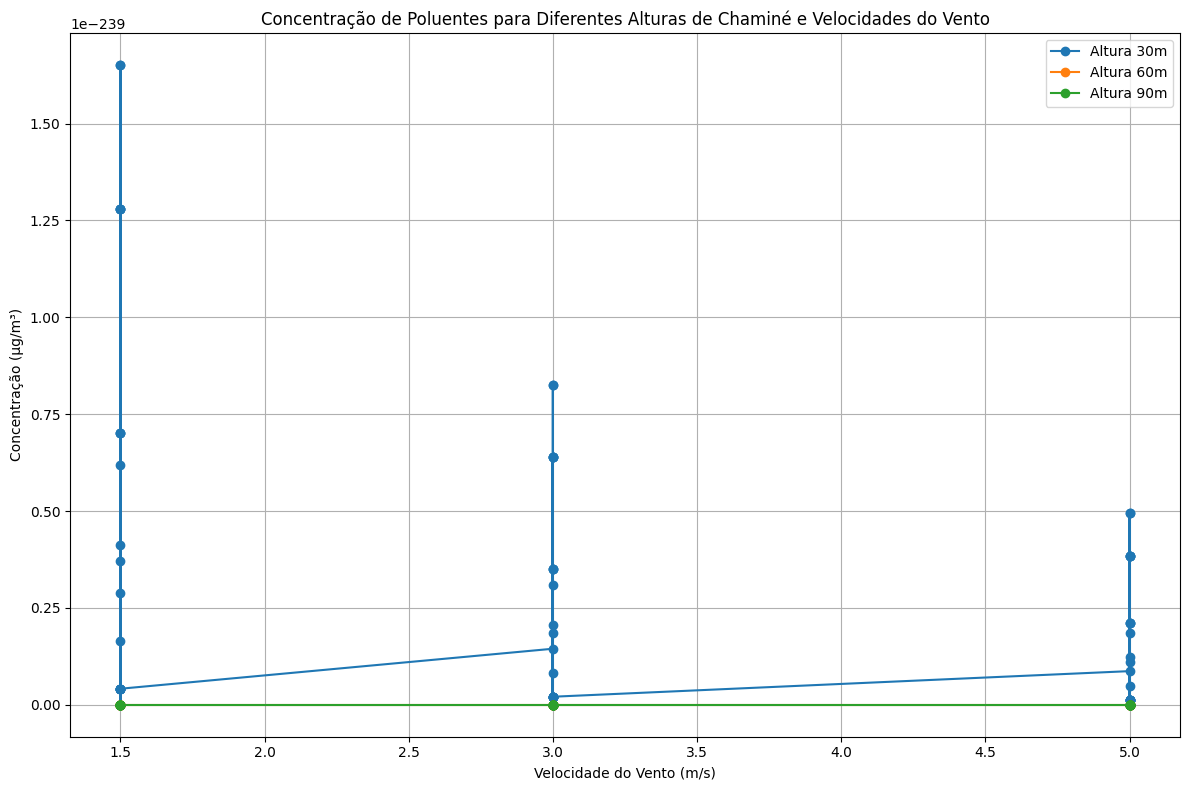

In [28]:
# Visualização
plt.figure(figsize=(12, 8))

for altura in alturas_chamine:
    subset = df_resultados[df_resultados['Altura'] == altura]
    plt.plot(subset['Vento'], subset['Concentração'], marker='o', label=f'Altura {altura}m')

plt.title('Concentração de Poluentes para Diferentes Alturas de Chaminé e Velocidades do Vento')
plt.xlabel('Velocidade do Vento (m/s)')
plt.ylabel('Concentração (μg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
